# Importing the dependencies

In [237]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data loading and preprocessing

In [238]:
df=pd.read_csv('/content/Customers.csv')

In [239]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [240]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [241]:
df0=df.dropna(axis=0).reset_index(drop=True)
df0

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1960,1996,Female,71,184387,40,Artist,8,7
1961,1997,Female,91,73158,32,Doctor,7,7
1962,1998,Male,87,90961,14,Healthcare,9,2
1963,1999,Male,77,182109,4,Executive,7,2


In [242]:
gender_count=df0['Gender'].value_counts()
gender_count


Female    1166
Male       799
Name: Gender, dtype: int64

In [243]:
names=gender_count.index
names

Index(['Female', 'Male'], dtype='object')

In [244]:
fig=px.pie(values=gender_count,names=gender_count.index)
fig.show()

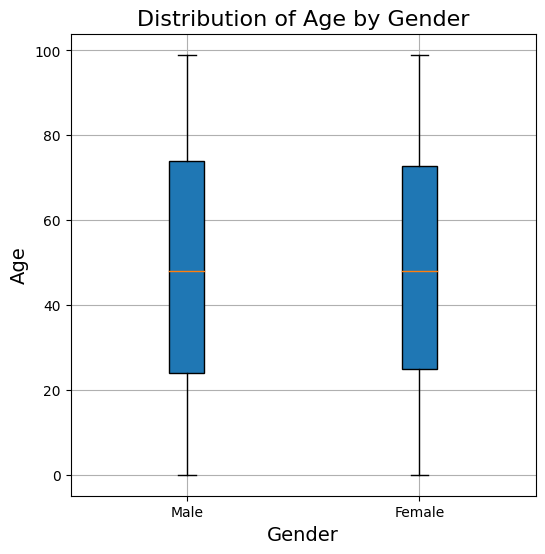

In [245]:
# boxplot of Age by Gender
plt.figure(figsize=(6, 6))
plt.boxplot([df0['Age'][df0['Gender'] == 'Male'], df0['Age'][df0['Gender'] == 'Female']], labels=['Male', 'Female'], patch_artist=True)


plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)


plt.grid(True)
plt.show()

In [246]:
median_age_male = df0['Age'][df0['Gender'] == 'Male'].median()
median_age_male

48.0

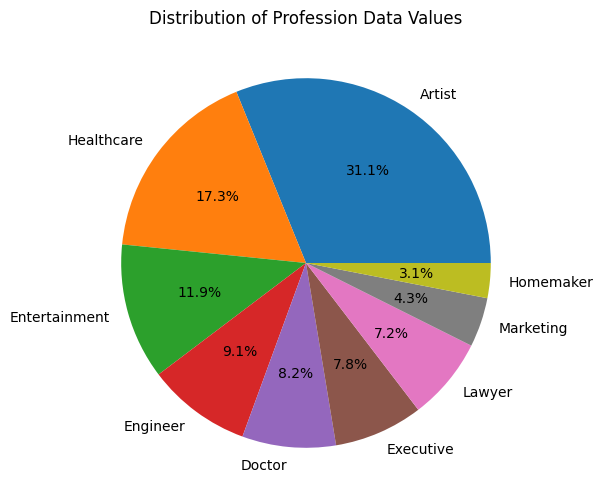

In [247]:

profession_dis = df0.Profession.value_counts()
names = profession_dis.index
plt.figure(figsize=(8, 6))
plt.pie(profession_dis, labels=names,autopct='%1.1f%%')

plt.title('Distribution of Profession Data Values')
plt.show()

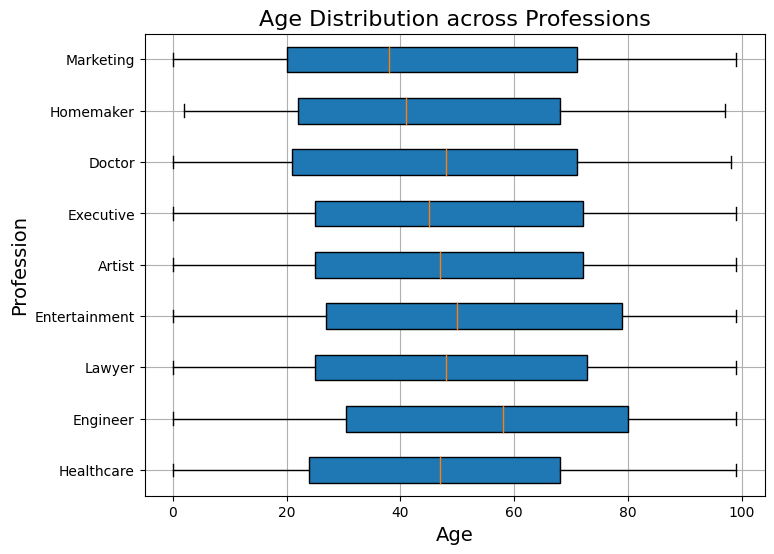

In [248]:
professions = df0['Profession'].unique()

plt.figure(figsize=(8, 6))
plt.boxplot([df0['Age'][df0['Profession'] == profession] for profession in professions], labels=professions, vert=False, patch_artist=True)
plt.title('Age Distribution across Professions', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Profession', fontsize=14)

plt.grid(True)
plt.show()

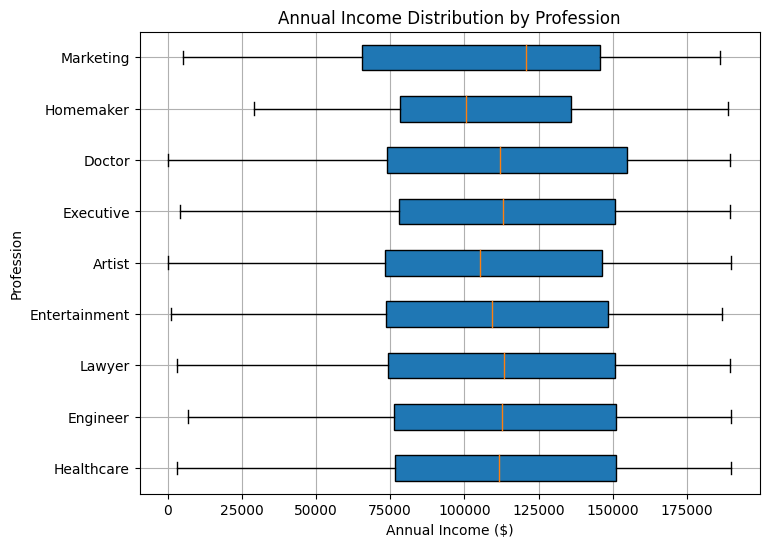

In [249]:

grouped_df = df0.groupby('Profession')

fig, ax = plt.subplots(figsize=(8, 6))
plt.boxplot([df0['Annual Income ($)'][df0['Profession'] == profession] for profession in professions], labels=professions, vert=False, patch_artist=True)
plt.title('Annual Income Distribution by Profession')
plt.ylabel('Profession')
plt.xlabel('Annual Income ($)')

plt.grid(True)
plt.show()

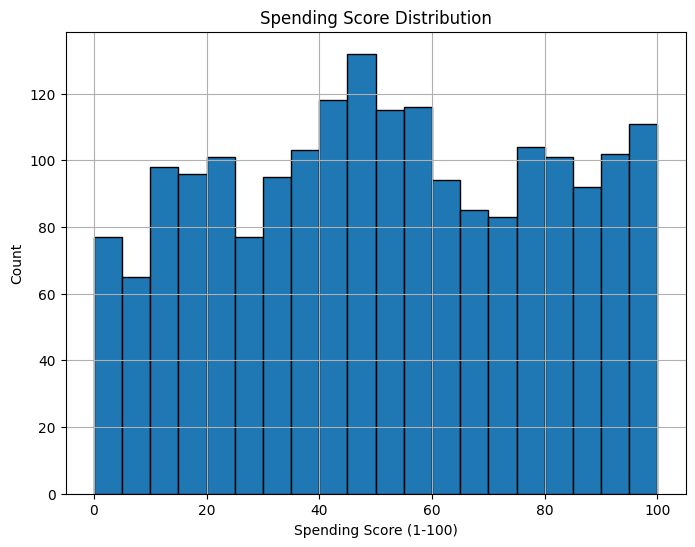

In [250]:

spending_score = df0['Spending Score (1-100)']

plt.figure(figsize=(8, 6))
plt.hist(spending_score, bins=20, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


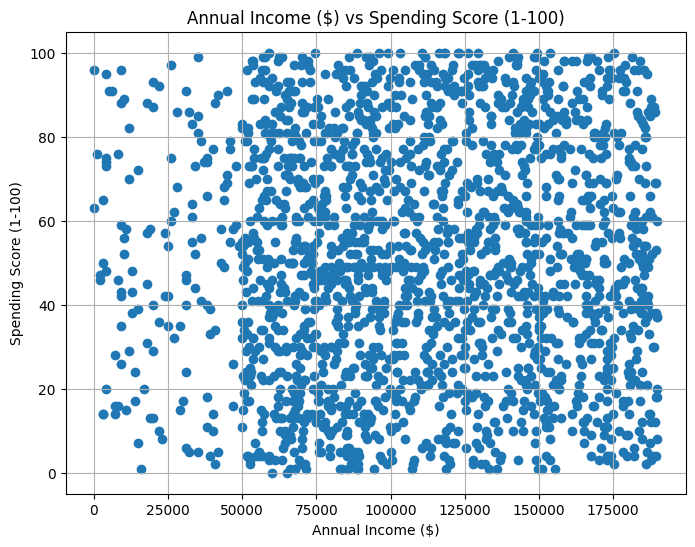

In [251]:
annual_income = df0['Annual Income ($)']
spending_score = df0['Spending Score (1-100)']
plt.figure(figsize=(8, 6))
plt.scatter(annual_income, spending_score)

plt.title('Annual Income ($) vs Spending Score (1-100)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')

plt.grid(True)
plt.show()

<ipython-input-252-34378d869795>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



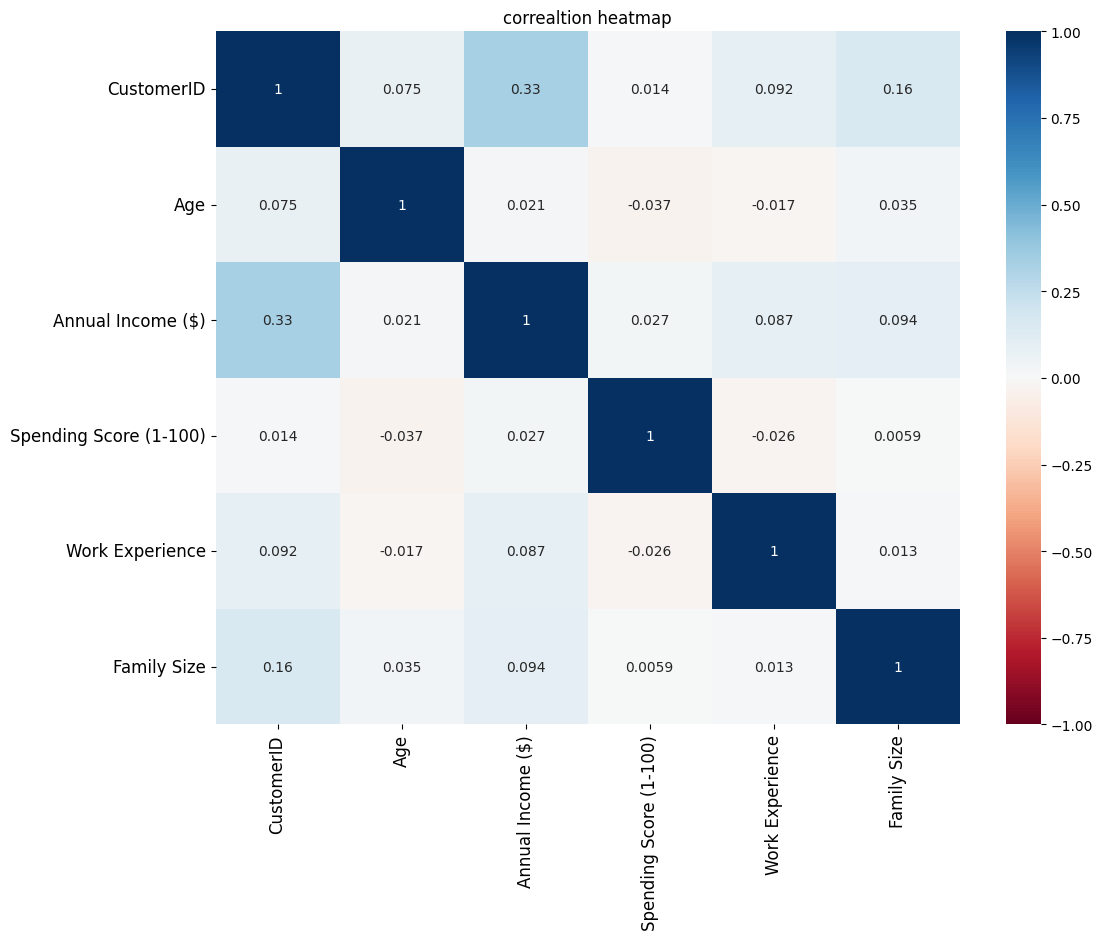

In [252]:
plt.figure(figsize = (12,9))
s=sns.heatmap(df0.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90,fontsize=12)
plt.title('correaltion heatmap')
plt.show()

In [253]:
df_subset=df0[['Annual Income ($)','Spending Score (1-100)']]
df_subset.head()

,Annual Income ($),Spending Score (1-100)
0,15000,39
1,35000,81
2,86000,6
3,59000,77
4,38000,40


In [254]:
scaler =MinMaxScaler()
scaler.fit(df_subset[['Annual Income ($)']])
df_subset['Annual Income ($)']=scaler.transform(df_subset[['Annual Income ($)']])
scaler.fit(df_subset[['Spending Score (1-100)']])
df_subset['Spending Score (1-100)']=scaler.transform(df_subset[['Spending Score (1-100)']])
df_subset

<ipython-input-254-d5b7693f8705>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-254-d5b7693f8705>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income ($),Spending Score (1-100)
0,0.078958,0.39
1,0.184236,0.81
2,0.452694,0.06
3,0.310569,0.77
4,0.200027,0.40
...,...,...
1960,0.970591,0.40
1961,0.385095,0.32
1962,0.478808,0.14
1963,0.958600,0.04


In [255]:
# k_rng=range(1,10)
# sse=[]
# for k in k_rng:
#   km=KMeans(n_clusters=k)
#   km.fit(df_subset[['Spending Score (1-100)','Annual Income ($)']])
#   sse.append(km.inertia_)
sse = []
for i in range(1, 10):  # Try different numbers of clusters (e.g., 1 to 10)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_subset[['Spending Score (1-100)','Annual Income ($)']])
    sse.append(kmeans.inertia_)

In [256]:
sse

[268.04767891278146,
 156.9044617734831,
 104.7606672904891,
 73.64008699174013,
 59.609518633131316,
 48.25892787150842,
 41.46619167113336,
 36.96936189110229,
 33.198188489177106]

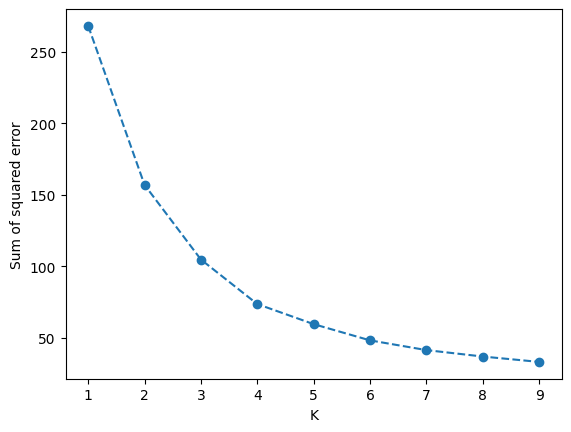

In [257]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 10), sse, marker='o', linestyle='--')

In [258]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [259]:
y_predicted=km.fit_predict(df_subset[['Annual Income ($)','Spending Score (1-100)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 0, 3, ..., 3, 1, 0], dtype=int32)

In [260]:
df_subset['cluster']=y_predicted
df_subset.head()

<ipython-input-260-6307ccc90eb1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income ($),Spending Score (1-100),cluster
0,0.078958,0.39,3
1,0.184236,0.81,0
2,0.452694,0.06,3
3,0.310569,0.77,0
4,0.200027,0.40,3


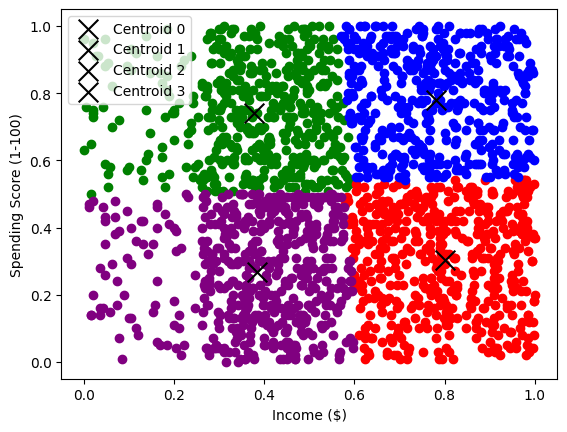

In [261]:
df1=df_subset[df_subset.cluster==0]
df2=df_subset[df_subset.cluster==1]

df3=df_subset[df_subset.cluster==2]
df4=df_subset[df_subset.cluster==3]


plt.scatter(df1['Annual Income ($)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income ($)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income ($)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income ($)'],df4['Spending Score (1-100)'],color='purple')


centroid1 = df1[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid2 = df2[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid3 = df3[['Annual Income ($)','Spending Score (1-100)']].mean()
centroid4 = df4[['Annual Income ($)','Spending Score (1-100)']].mean()


plt.scatter( centroid1['Annual Income ($)'],centroid1['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 0')
plt.scatter( centroid2['Annual Income ($)'],centroid2['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 1')
plt.scatter( centroid3['Annual Income ($)'],centroid3['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 2')
plt.scatter( centroid4['Annual Income ($)'],centroid4['Spending Score (1-100)'], color='black', marker='x', s=200, label='Centroid 3')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Income ($)')
plt.legend()

In [262]:

# X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']].copy()

# dbscan = DBSCAN(eps=0.08, min_samples=30)
# dbscan_labels = dbscan.fit_predict(X)


# plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=dbscan_labels)
# plt.xlabel('Annual Income ($)')
# plt.ylabel('Spending Score (1-100)')
# plt.show()

# df_subset['DBSCAN Cluster'] = dbscan_labels

<ipython-input-263-8f19d8281bd9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



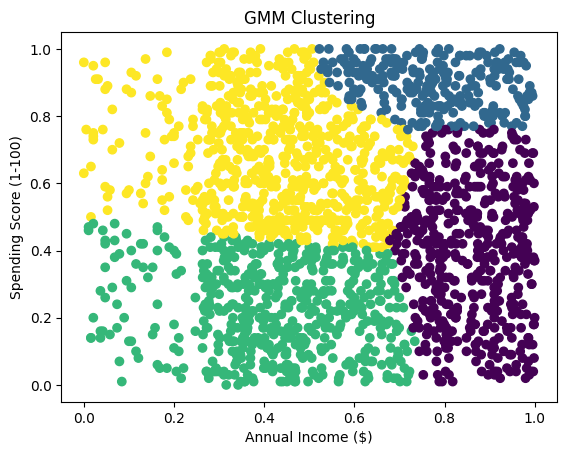

In [263]:

X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']]

n_components = 4
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)


cluster_labels = gmm.predict(X)

df_subset['GMM Cluster'] = cluster_labels

plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')
plt.show()

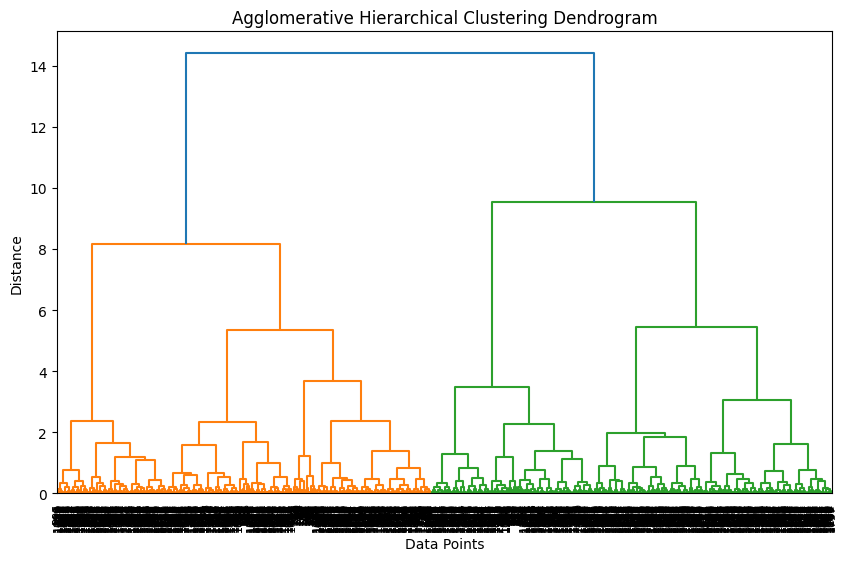

In [264]:
X = df_subset[['Annual Income ($)', 'Spending Score (1-100)']]


linkage_matrix = linkage(X, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.show()

In [268]:

kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
gmm_labels = gmm.predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)
n_clusters_agglomerative = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agglomerative)
agg_labels = agg_clustering.fit_predict(X)
agg_silhouette = silhouette_score(X, agg_labels)


print("K-Means Silhouette Score:", kmeans_silhouette)
print("GMM Silhouette Score:", gmm_silhouette)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K-Means Silhouette Score: 0.3779468635004405
GMM Silhouette Score: 0.3731913371582245
Agglomerative Clustering Silhouette Score: 0.32556016730615


In [266]:
if kmeans_silhouette > gmm_silhouette and kmeans_silhouette > agg_silhouette:
    print("K-Means clustering has the highest Silhouette Score.")
elif gmm_silhouette > kmeans_silhouette and gmm_silhouette > agg_silhouette:
    print("GMM clustering has the highest Silhouette Score.")
elif agg_silhouette > kmeans_silhouette and agg_silhouette > gmm_silhouette:
    print("Hierarchical Clustering has the highest Silhouette Score.")
else:
    print("All methods have similar Silhouette Scores.")

K-Means clustering has the highest Silhouette Score.


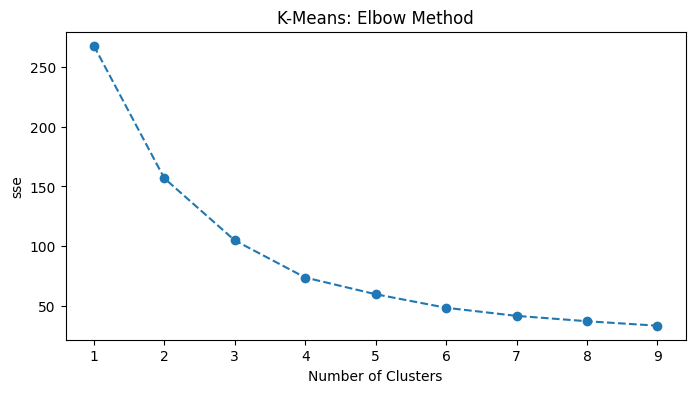

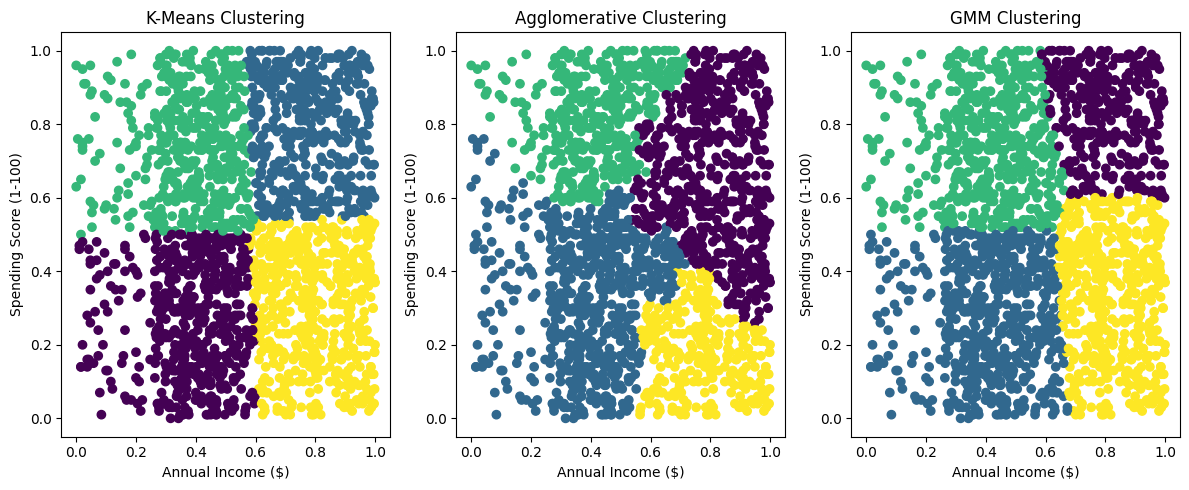

In [269]:

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.title('K-Means: Elbow Method')
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=agg_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=gmm_labels, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()